In [2]:
import numpy as np
import pickle
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
from utils.experiments import *
from config import FIGURE_DIR
from config import TABLE_DIR

In [3]:
res = []
for p in Path(f'results/1RSB-experiments').glob('*'):
    #print(p)
    a = load_pickle(p)
    k = str(p).split('/')[-1]
    d = int(k.split('_')[0])
    p = int(k.split('_')[1])
    try:
        rho_temp = float(k.split('_')[3])
    except:
        continue
    
    res.append({
        **a,
        'd': d,
        'p': p,
        'rho_temp': rho_temp
    })

df = pd.DataFrame(res)
df = df[~df.observables.isna()]
df['rho'] = df.observables.apply(lambda x: x[0] * 2 - 1)

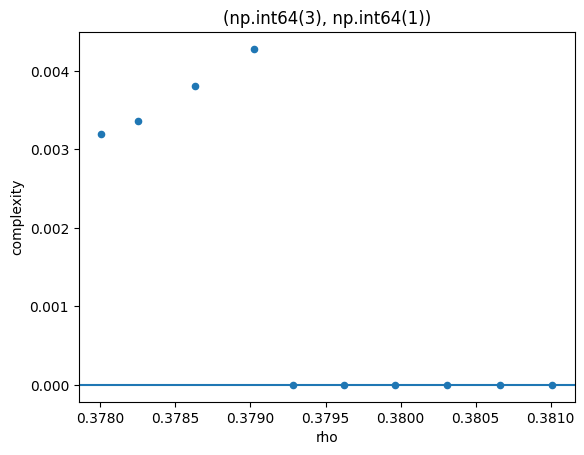

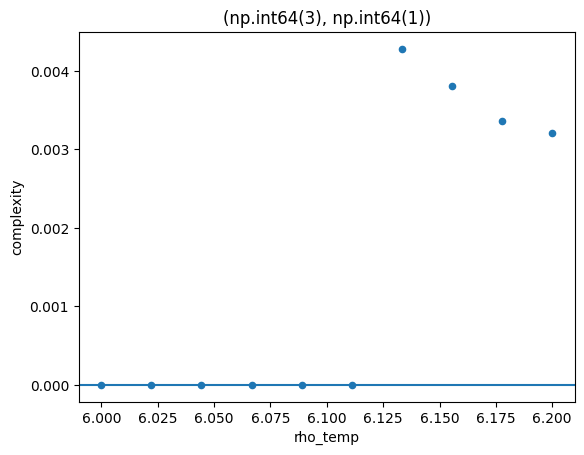

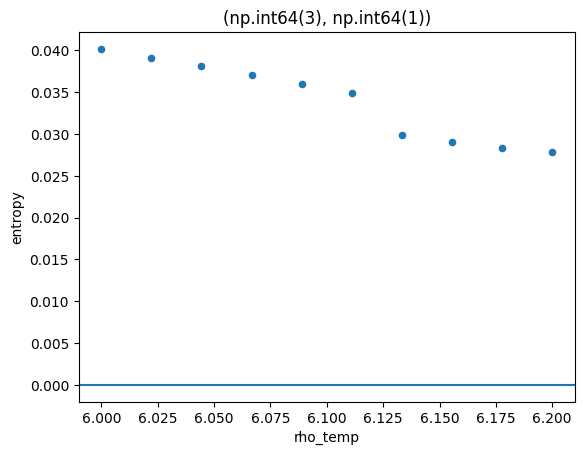

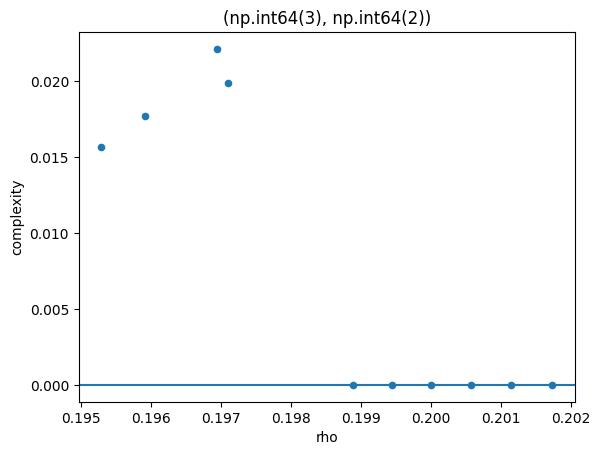

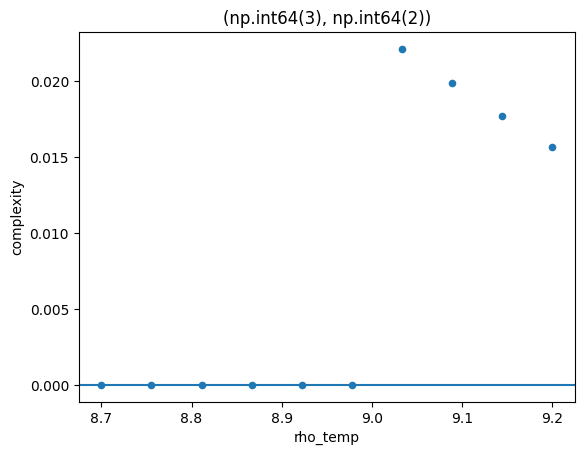

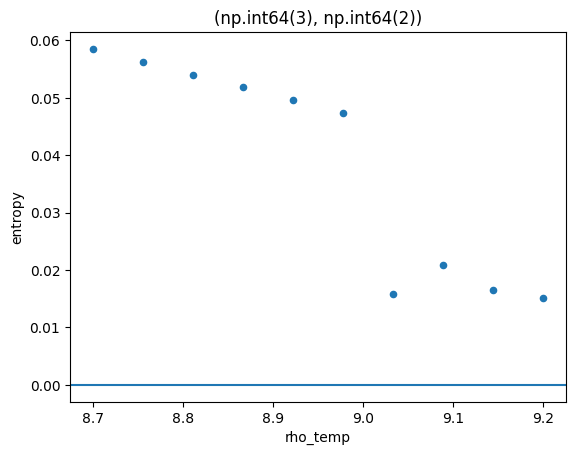

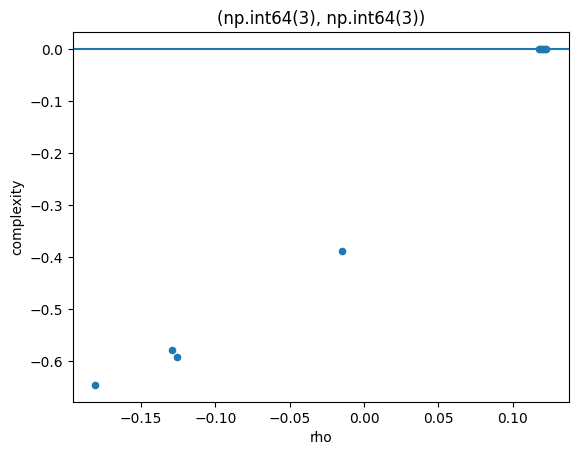

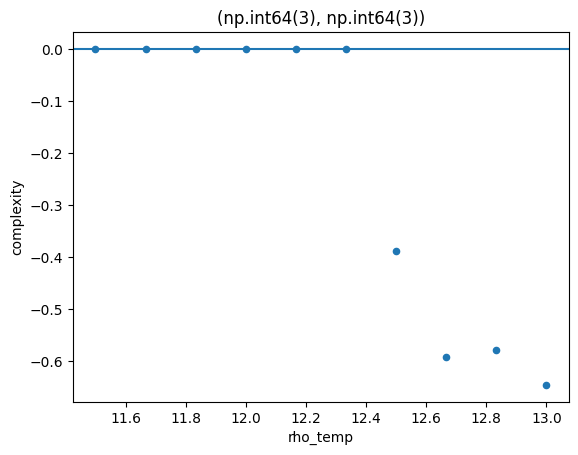

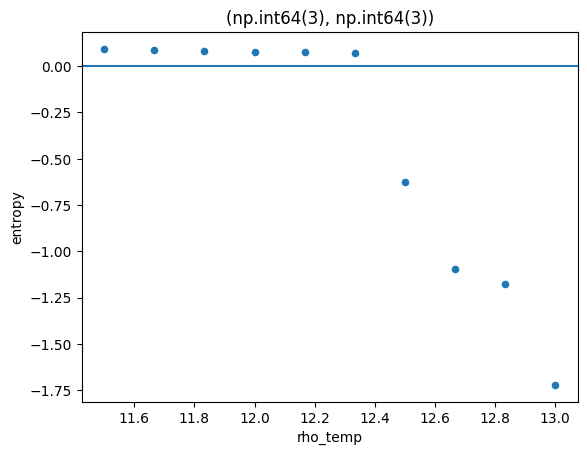

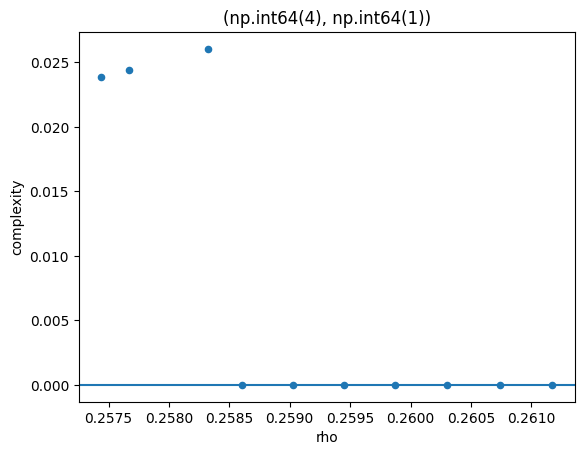

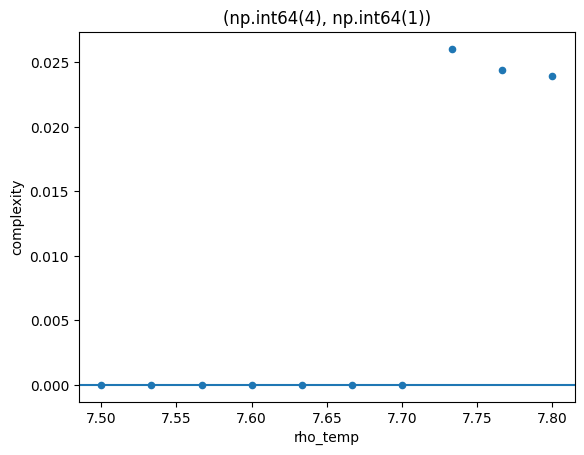

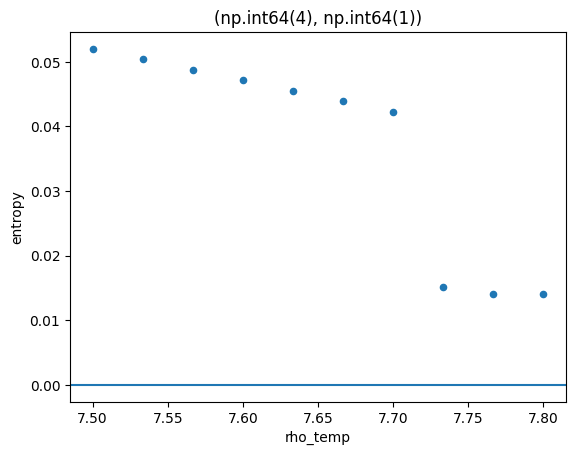

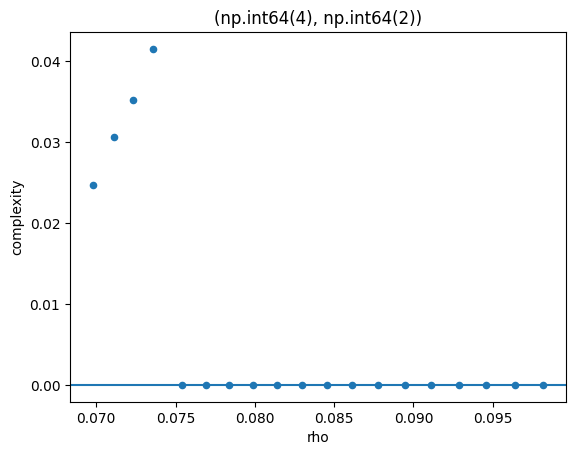

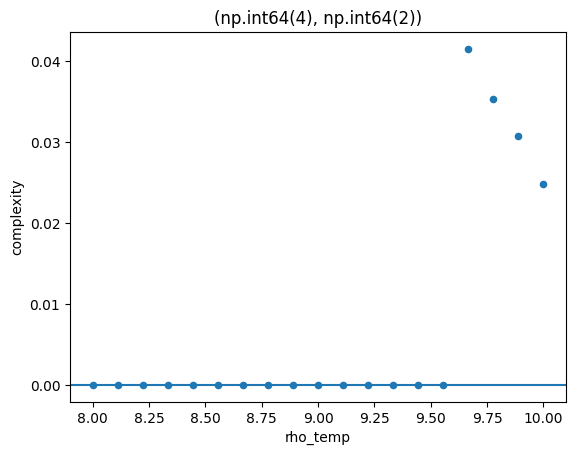

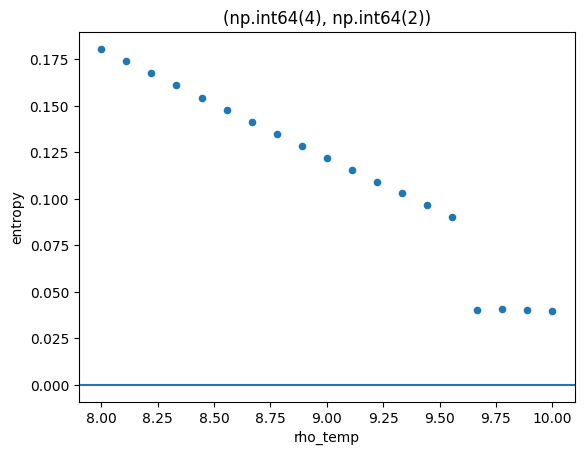

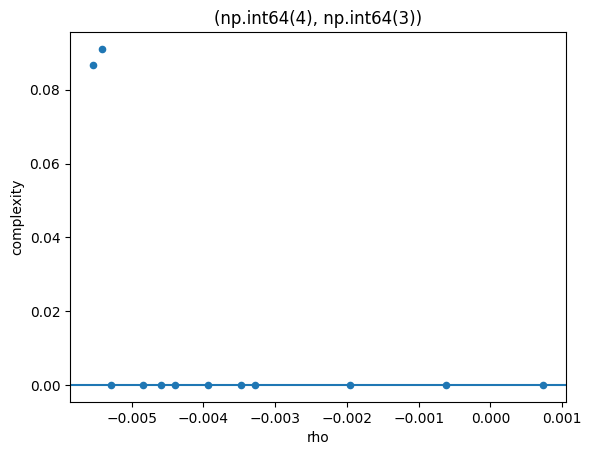

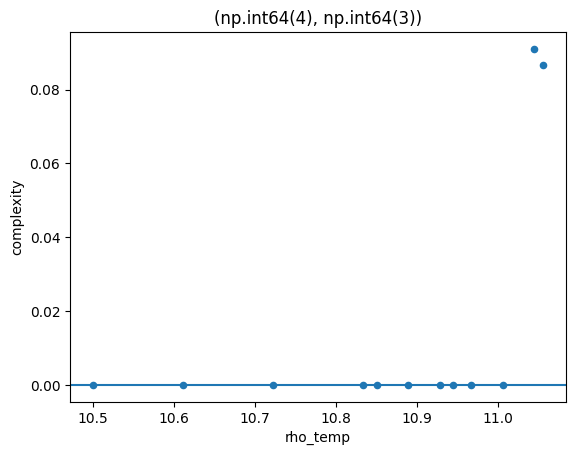

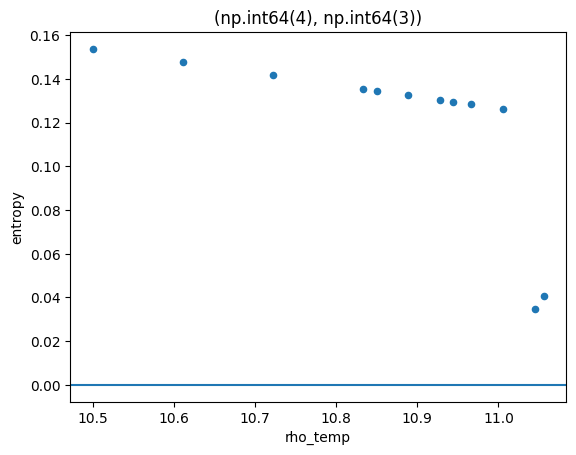

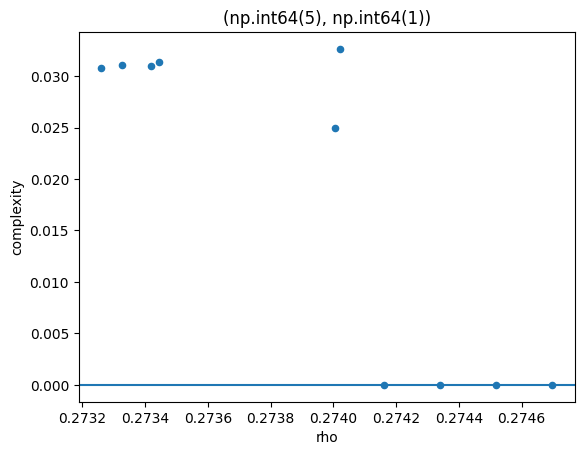

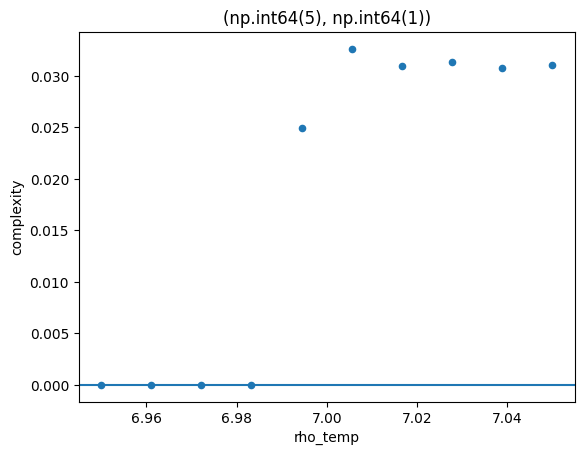

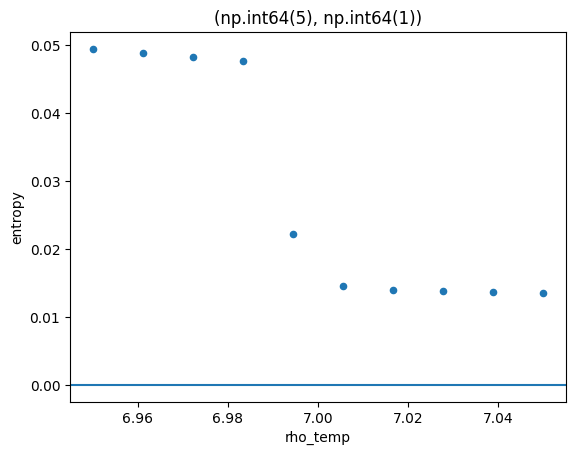

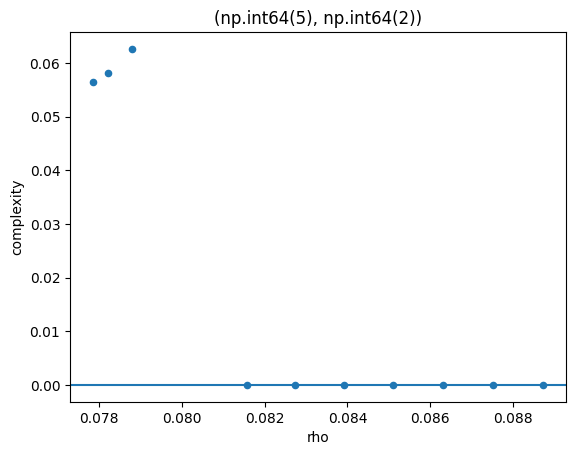

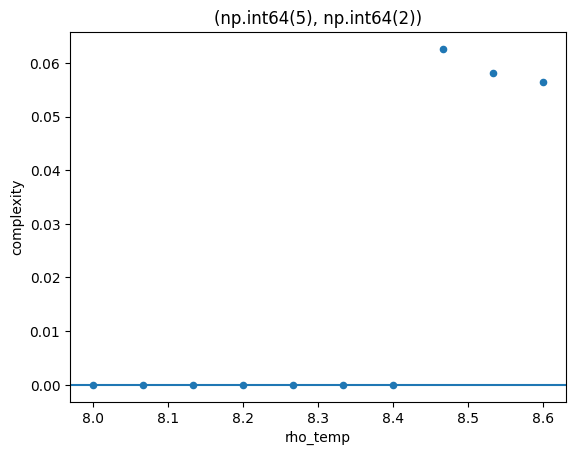

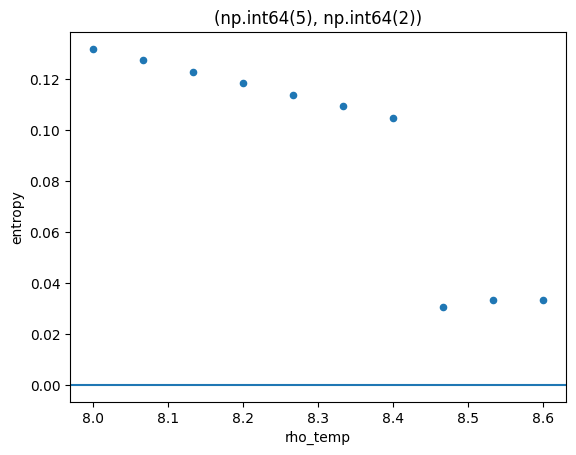

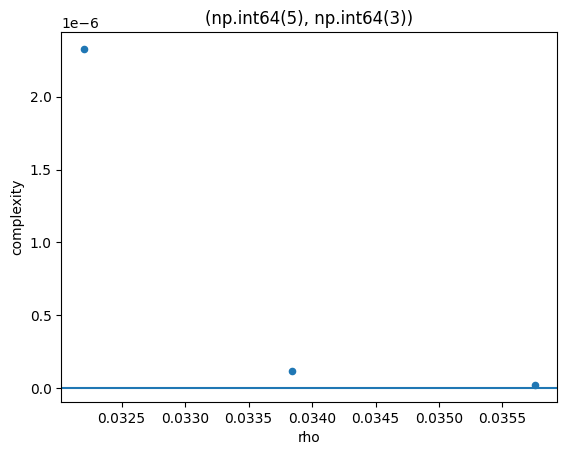

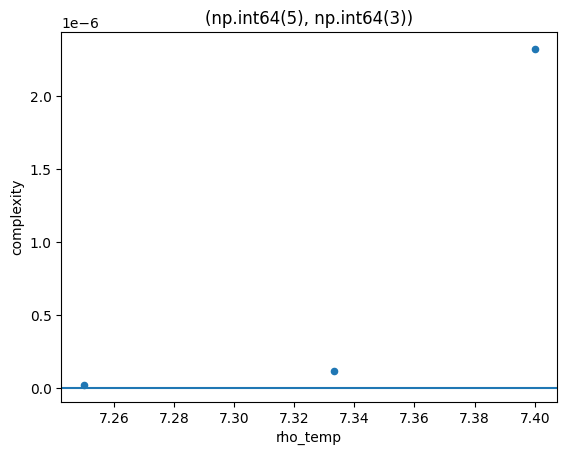

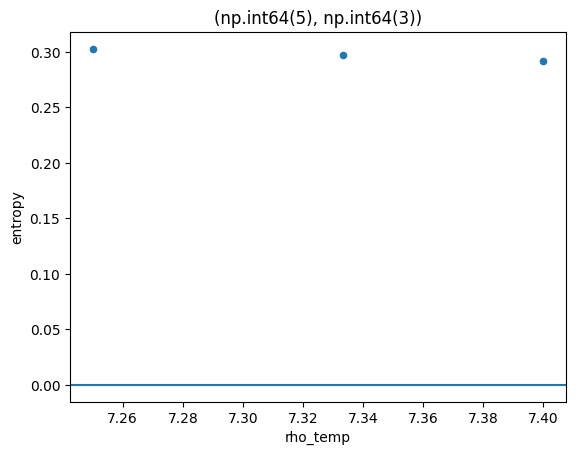

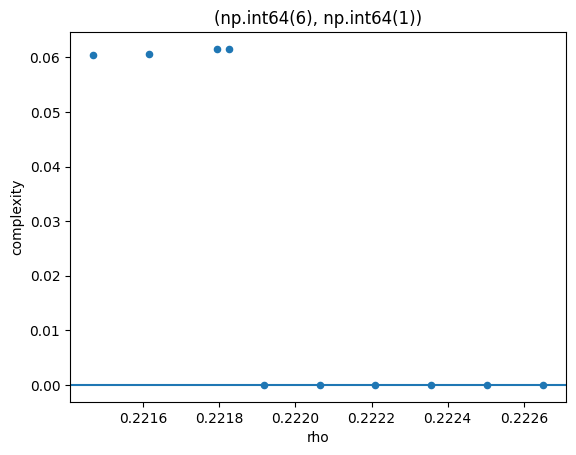

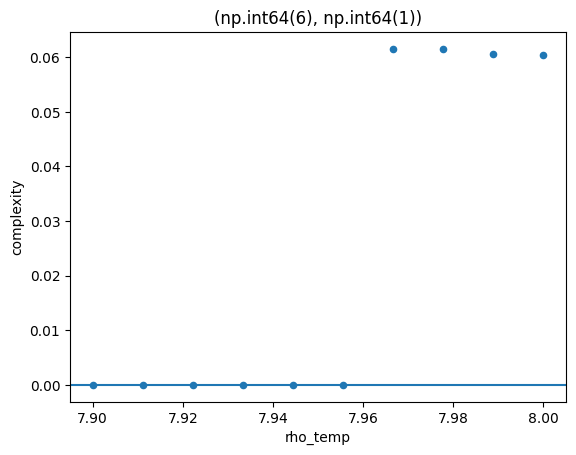

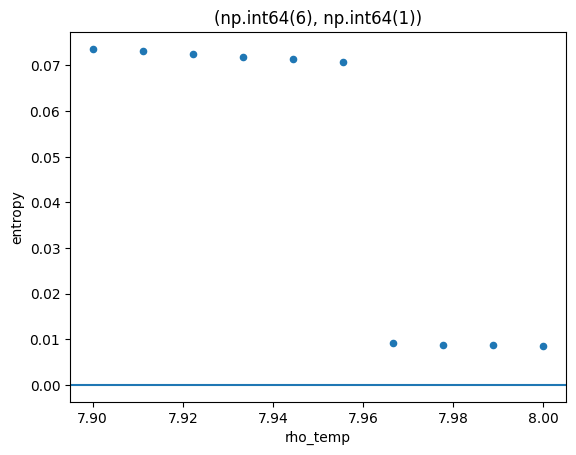

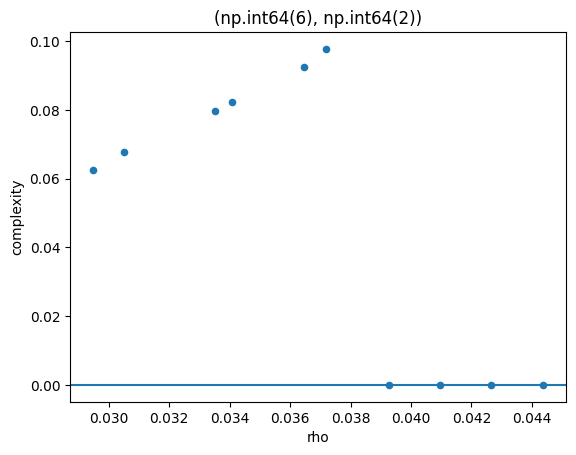

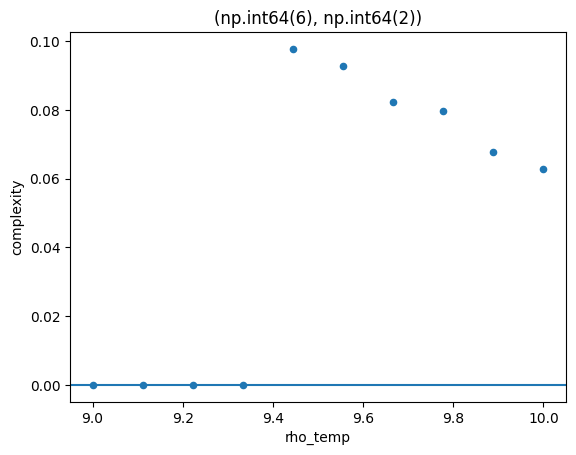

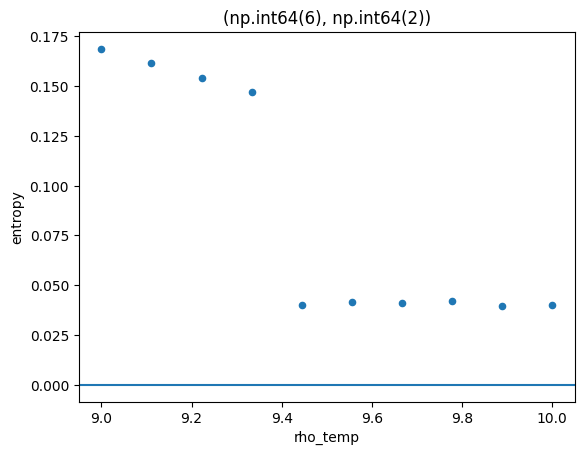

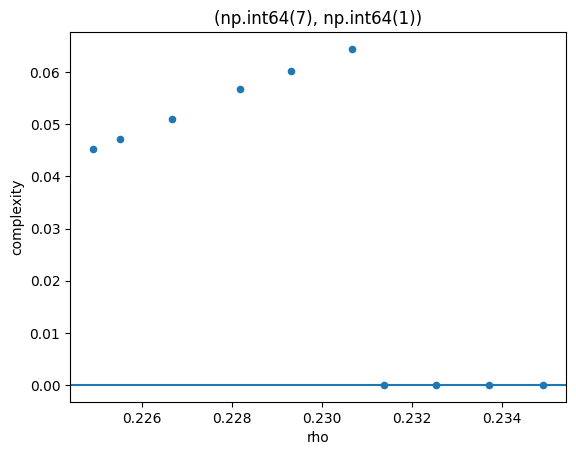

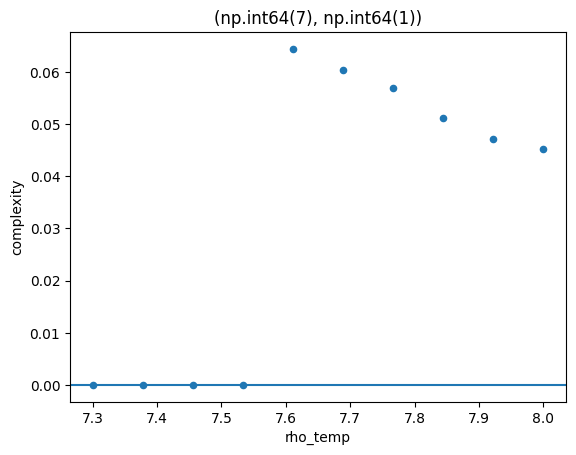

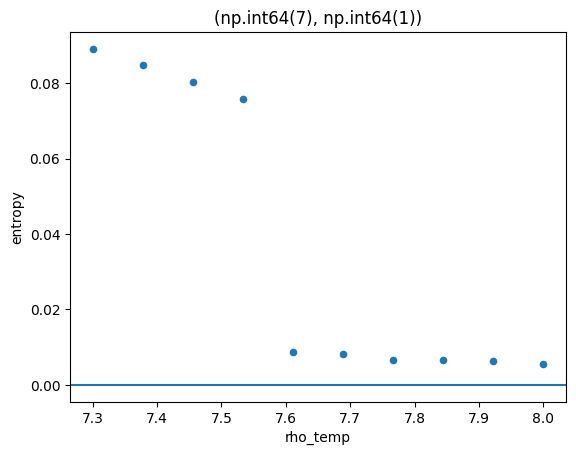

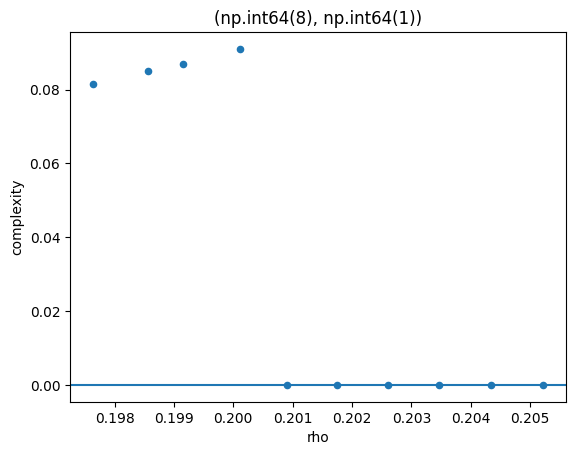

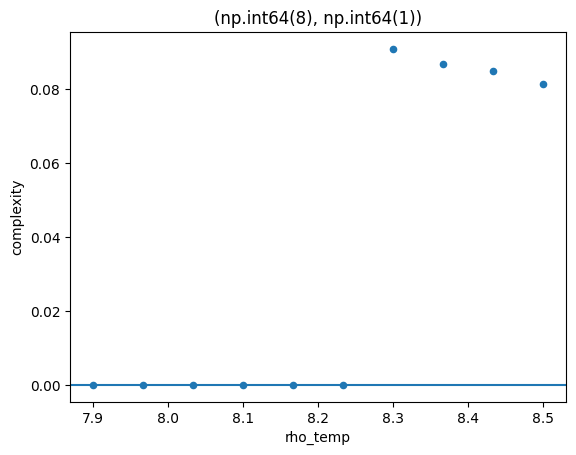

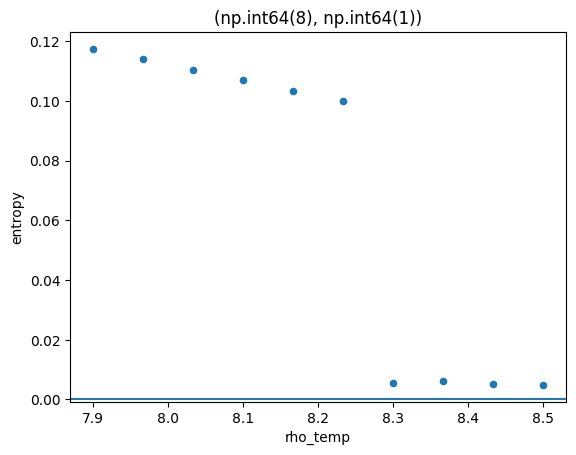

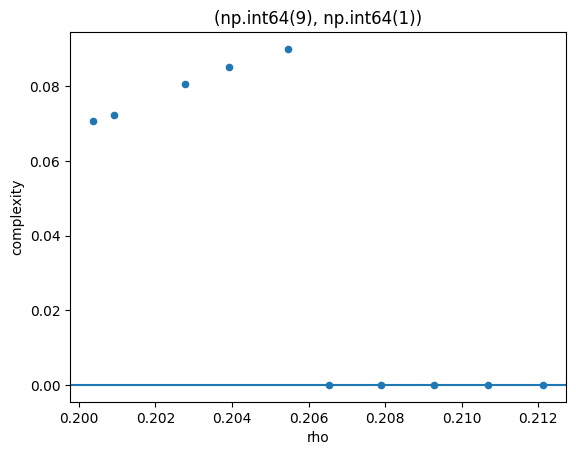

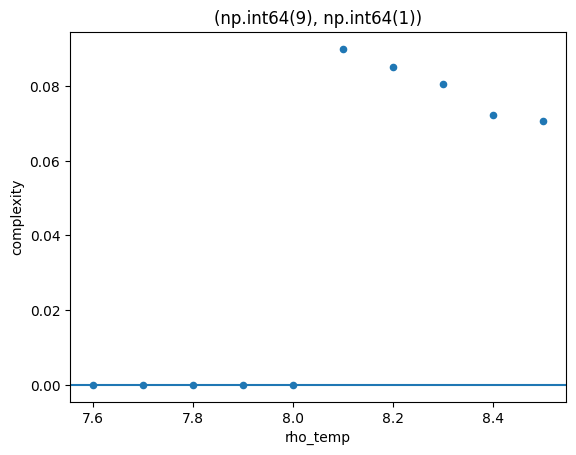

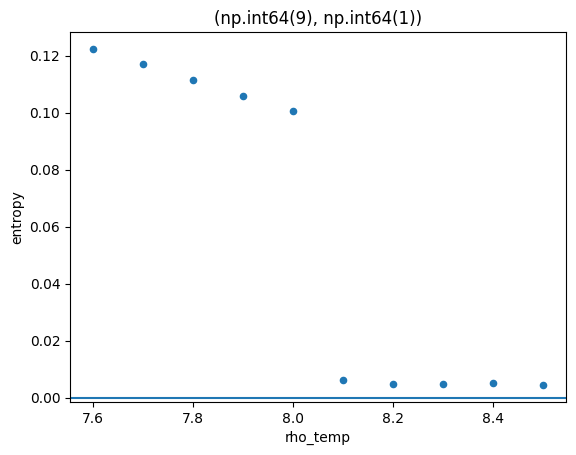

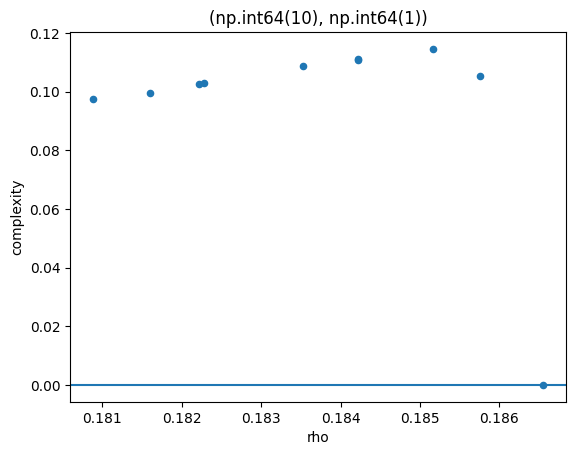

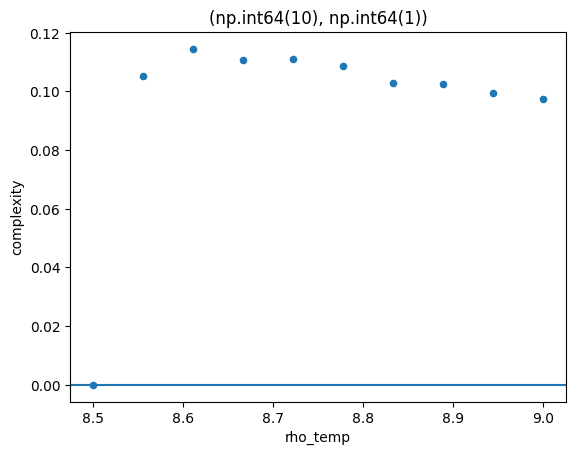

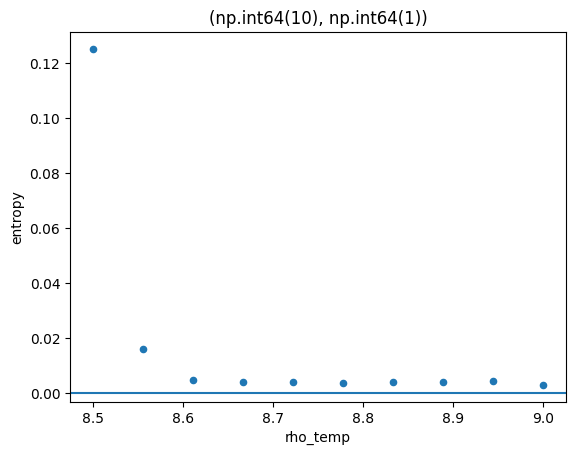

In [4]:
for (d,p), g in df.groupby(['d','p']):
    #g.groupby('rho_temp').mean().plot.scatter('rho','entropy')
    
    g.groupby('rho_temp')[['complexity','rho']].mean().reset_index().plot.scatter('rho','complexity')
    plt.title((d,p))
    plt.axhline(0)
    
    g.groupby('rho_temp')[['complexity','rho']].mean().reset_index().plot.scatter('rho_temp','complexity')
    plt.title((d,p))
    plt.axhline(0)
    
    g.groupby('rho_temp')[['complexity','rho','entropy']].mean().reset_index().plot.scatter('rho_temp','entropy')
    plt.title((d,p))
    plt.axhline(0)
    
    plt.show()


In [5]:
print('p,d,argmin_m(complexity = 0 ), argmax_m(complexity > 0), complexity')

for (p,d), g in df.sort_values(['p','d']).groupby(['p','d']):
    #g.groupby('rho_temp').mean().plot.scatter('rho','entropy')
    
    g = g.groupby('rho_temp')[['complexity','rho']].mean().reset_index()
    
    min_rho = g[np.isclose(g.complexity,0)].rho.min()
    max_rho = g[~np.isclose(g.complexity,0)].rho.max()
    complexity = g[g.rho == max_rho].complexity.values[0]
    print(p,d,min_rho, max_rho, complexity)


p,d,argmin_m(complexity = 0 ), argmax_m(complexity > 0), complexity
1 3 0.3792818747752728 0.3790220438470021 0.004281383084618866
1 4 0.2586071722416769 0.2583244210155282 0.026051806715457957
1 5 0.27416152003123234 0.27402163230609483 0.03263603706530082
1 6 0.22191761497753587 0.22182630795026323 0.06145769220426965
1 7 0.2313672339791133 0.23066840531876967 0.06445767881329154
1 8 0.20089837783357253 0.20010771228532825 0.09099833023123353
1 9 0.20652421546071684 0.20547356676417516 0.0899914570020798
1 10 0.1865535803470468 0.1857585770088173 0.10540735804251074
2 3 0.1988814352181178 0.2017353901042911 1.0872163529462852e-08
2 4 0.07543542951023427 0.07360531822361725 0.04146812461261036
2 5 0.08157504823197981 0.07878442768838786 0.06262935401968173
2 6 0.03926148835368444 0.03718621836868086 0.09777216383634704
3 3 0.11738513553433486 -0.014543321263974573 -0.38759828909770266
3 4 -0.005294027384827582 -0.00541633749177931 0.09105314330182956
3 5 nan 0.035753877161707935 2.371

In [6]:
rows = []

for (p,d), g in df.sort_values(['p','d']).groupby(['p','d']):
    #g.groupby('rho_temp').mean().plot.scatter('rho','entropy')
    
    g = g.groupby('rho_temp')[['complexity','rho']].mean().reset_index()
    
    min_rho = g[np.isclose(g.complexity,0)].rho.min()
    max_rho = g[~np.isclose(g.complexity,0)].rho.max()
    complexity = g[g.rho == max_rho].complexity.values[0]
    print(p,d,min_rho, max_rho)
    
    rows.append({
        'p': p,
        'd': d,
        'lower_estimate': min_rho,
        'upper_estimate': max_rho,
        'complexity': complexity
    })

summary_df = pd.DataFrame(rows)
summary_df.to_csv('tables/dynamic_rsb.csv', index=False)

1 3 0.3792818747752728 0.3790220438470021
1 4 0.2586071722416769 0.2583244210155282
1 5 0.27416152003123234 0.27402163230609483
1 6 0.22191761497753587 0.22182630795026323
1 7 0.2313672339791133 0.23066840531876967
1 8 0.20089837783357253 0.20010771228532825
1 9 0.20652421546071684 0.20547356676417516
1 10 0.1865535803470468 0.1857585770088173
2 3 0.1988814352181178 0.2017353901042911
2 4 0.07543542951023427 0.07360531822361725
2 5 0.08157504823197981 0.07878442768838786
2 6 0.03926148835368444 0.03718621836868086
3 3 0.11738513553433486 -0.014543321263974573
3 4 -0.005294027384827582 -0.00541633749177931
3 5 nan 0.035753877161707935
